In [4]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\SHRIYANSH\Desktop\heart.csv")



In [5]:
# Basic info
print(df.shape)        # rows, columns
print(df.head())       # first 5 rows
print(df.info())       # column types
print(df.describe())   # summary statistics

(1025, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null 

In [6]:
# Missing values
print(df.isnull().sum())

# Duplicates
print("Duplicate rows:", df.duplicated().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Duplicate rows: 723


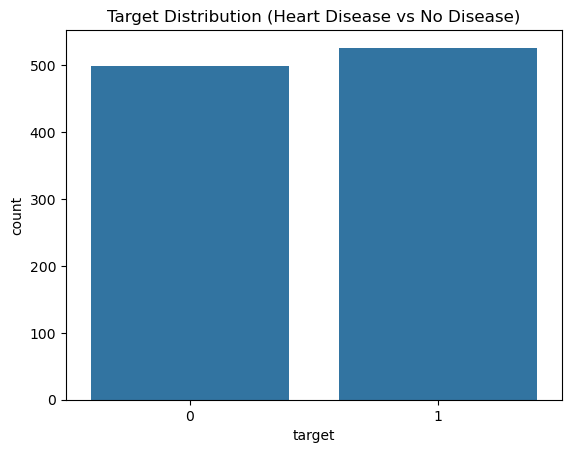

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Target distribution
sns.countplot(x="target", data=df)
plt.title("Target Distribution (Heart Disease vs No Disease)")
plt.show()

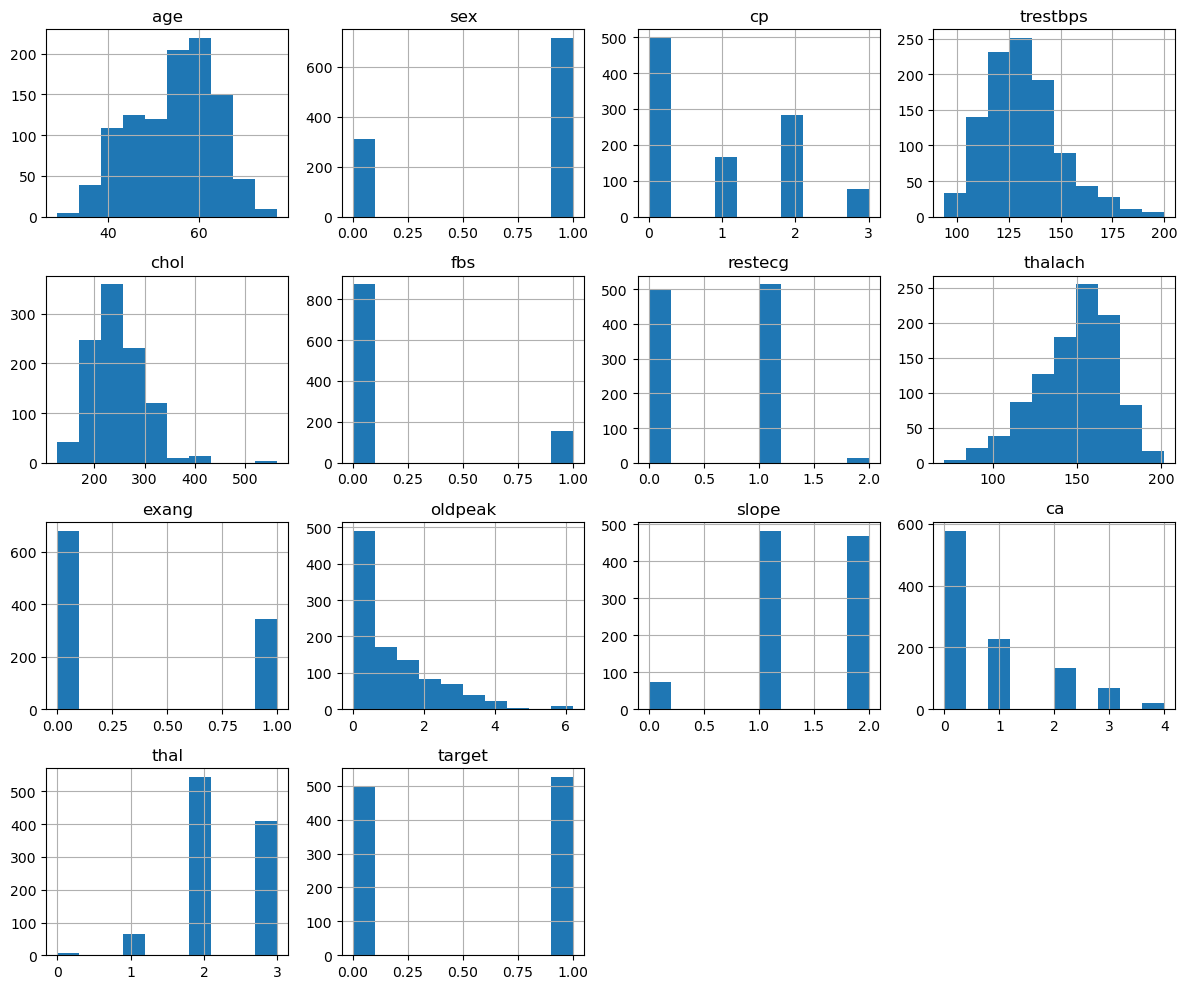

In [8]:
# Histograms for numerical features
df.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

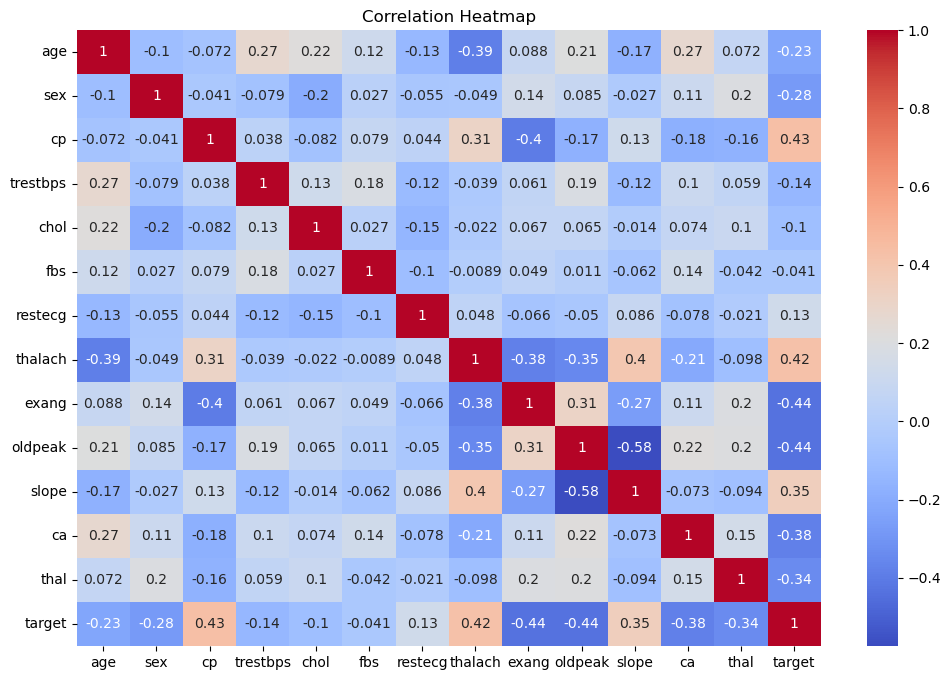

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [10]:
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
categorical_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)



In [11]:
print(df_encoded.head())
print(df_encoded.shape)

   age  trestbps  chol  thalach  oldpeak  target  sex_1   cp_1   cp_2   cp_3  \
0   52       125   212      168      1.0       0   True  False  False  False   
1   53       140   203      155      3.1       0   True  False  False  False   
2   70       145   174      125      2.6       0   True  False  False  False   
3   61       148   203      161      0.0       0   True  False  False  False   
4   62       138   294      106      1.9       0  False  False  False  False   

   ...  exang_1  slope_1  slope_2   ca_1   ca_2   ca_3   ca_4  thal_1  thal_2  \
0  ...    False    False     True  False   True  False  False   False   False   
1  ...     True    False    False  False  False  False  False   False   False   
2  ...     True    False    False  False  False  False  False   False   False   
3  ...    False    False     True   True  False  False  False   False   False   
4  ...    False     True    False  False  False   True  False   False    True   

   thal_3  
0    True  
1    Tru

In [12]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df_encoded.drop("target", axis=1)
y = df_encoded["target"]

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (820, 22)
Test size: (205, 22)


In [14]:
print("Train target distribution:\n", y_train.value_counts())
print("Test target distribution:\n", y_test.value_counts())

Train target distribution:
 target
1    421
0    399
Name: count, dtype: int64
Test target distribution:
 target
1    105
0    100
Name: count, dtype: int64


In [19]:
#random forest implementation

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
# Predictions
y_pred_rf = rf_clf.predict(X_test)
y_prob_rf = rf_clf.predict_proba(X_test)[:,1]  # probabilities for AUC

In [27]:
# Calculate metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
mcc_rf = matthews_corrcoef(y_test, y_pred_rf)

In [28]:
print("Random Forest Results")
print("Accuracy:", accuracy_rf)
print("AUC:", auc_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("MCC:", mcc_rf)

Random Forest Results
Accuracy: 1.0
AUC: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
MCC: 1.0


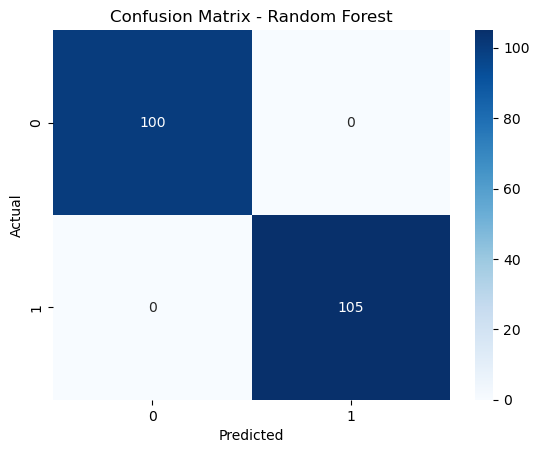

In [25]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [30]:
import joblib

joblib.dump(rf_clf, "model/random_forest.pkl")


['model/random_forest.pkl']